**Importing the Important Libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

**Importing Dataset into Colab.**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank_transactions_data_2.csv to bank_transactions_data_2.csv


In [3]:
df = pd.read_csv('bank_transactions_data_2.csv')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,11/04/2023 16:29,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,04/11/2024 08:08
1,TX000002,AC00455,376.24,27/06/2023 16:44,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,04/11/2024 08:09
2,TX000003,AC00019,126.29,10/07/2023 18:16,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,04/11/2024 08:07
3,TX000004,AC00070,184.50,05/05/2023 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,04/11/2024 08:09
4,TX000005,AC00411,13.45,16/10/2023 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,04/11/2024 08:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,26/04/2023 17:09,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,04/11/2024 08:11
2508,TX002509,AC00322,251.54,22/03/2023 17:36,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,04/11/2024 08:11
2509,TX002510,AC00095,28.63,21/08/2023 17:08,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,04/11/2024 08:08
2510,TX002511,AC00118,185.97,24/02/2023 16:24,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,04/11/2024 08:12


**Data Exploration.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


**Exploratory Analysis**

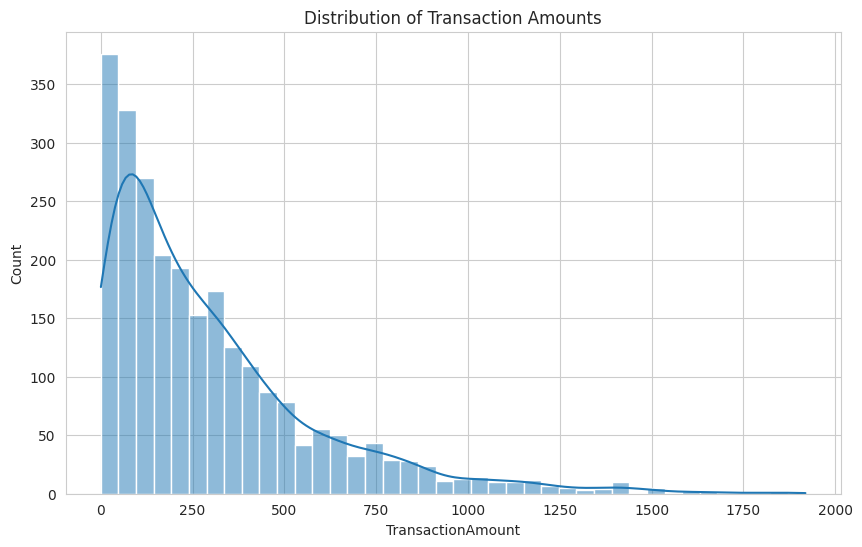

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['TransactionAmount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

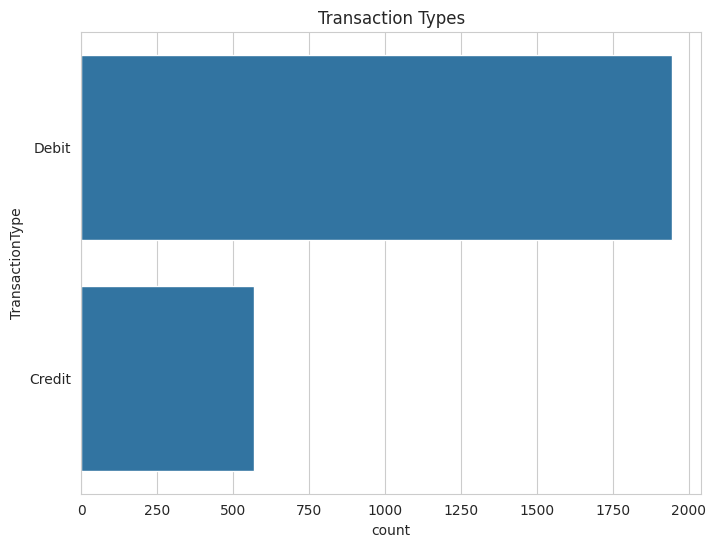

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(df['TransactionType'])
plt.title('Transaction Types')
plt.show()

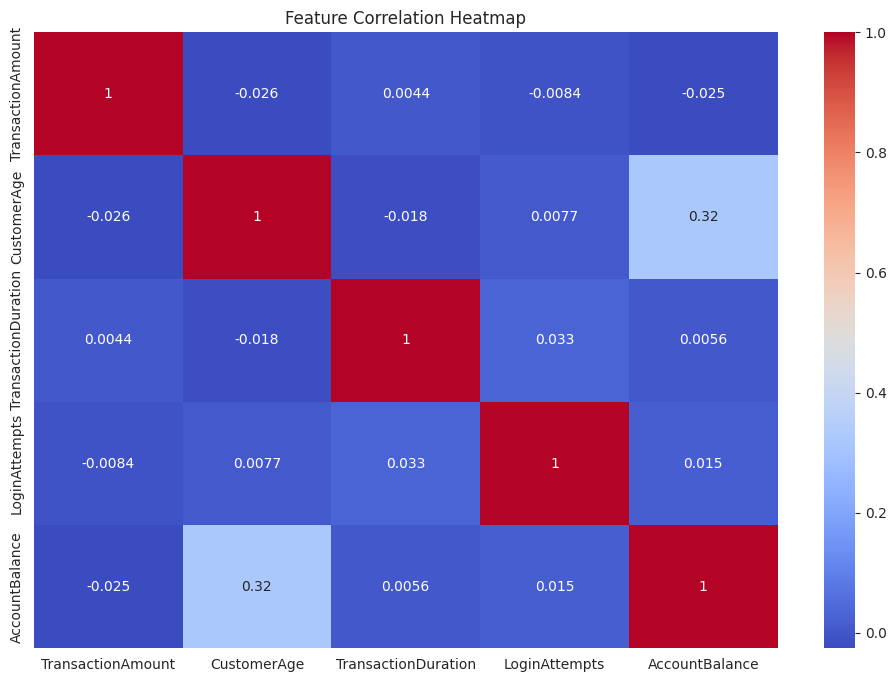

In [10]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
# Convert dates to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%Y %H:%M', dayfirst=True)
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Time-based features
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 3600


# Amount-based features
df['AmountToBalanceRatio'] = df['TransactionAmount'] / df['AccountBalance']
df['LargeTransactionFlag'] = (df['TransactionAmount'] > df['TransactionAmount'].quantile(0.95)).astype(int)

# Behavioral features
transaction_frequency = df.groupby('AccountID')['TransactionID'].count().reset_index(name='TransactionFrequency')
if 'TransactionFrequency' in df.columns:
    df = df.drop('TransactionFrequency', axis=1)
df = df.merge(transaction_frequency, on='AccountID', how='left')

# Device/IP features
device_usage = df.groupby('DeviceID')['AccountID'].nunique().reset_index(name='AccountsPerDevice')
if 'AccountsPerDevice' in df.columns:
    df = df.drop('AccountsPerDevice', axis=1)
df = df.merge(device_usage, on='DeviceID', how='left')

ip_usage = df.groupby('IP Address')['AccountID'].nunique().reset_index(name='AccountsPerIP')
if 'AccountsPerIP' in df.columns:
    df = df.drop('AccountsPerIP', axis=1)
df = df.merge(ip_usage, on='IP Address', how='left')

In [12]:
# Calculate z-scores for transaction amounts by account
df['AmountZScore'] = df.groupby('AccountID')['TransactionAmount'].transform(
    lambda x: (x - x.mean()) / x.std()
)

df['LocationChange'] = df.groupby(['AccountID', 'DeviceID'])['Location'].transform(
    lambda x: x != x.shift(1)
)
df['LocationChange'] = df['LocationChange'].fillna(False)


# Unusual login attempts
df['HighLoginAttempts'] = (df['LoginAttempts'] > 1).astype(int)

In [26]:
features = ['TransactionAmount', 'LoginAttempts', 'AmountToBalanceRatio',
            'AccountsPerDevice', 'AccountsPerIP']

X = df[features].fillna(0)

# Quick stats
print(X.describe())

       TransactionAmount  LoginAttempts  AmountToBalanceRatio  \
count        2512.000000    2512.000000           2512.000000   
mean          297.593778       1.124602              0.200013   
std           291.946243       0.602662              0.511866   
min             0.260000       1.000000              0.000045   
25%            81.885000       1.000000              0.018161   
50%           211.140000       1.000000              0.051922   
75%           414.527500       1.000000              0.151656   
max          1919.110000       5.000000              7.895988   

       AccountsPerDevice  AccountsPerIP  
count        2512.000000    2512.000000  
mean            4.541401       5.130573  
std             1.820685       2.040722  
min             1.000000       1.000000  
25%             3.000000       4.000000  
50%             4.000000       5.000000  
75%             6.000000       6.000000  
max             9.000000      13.000000  


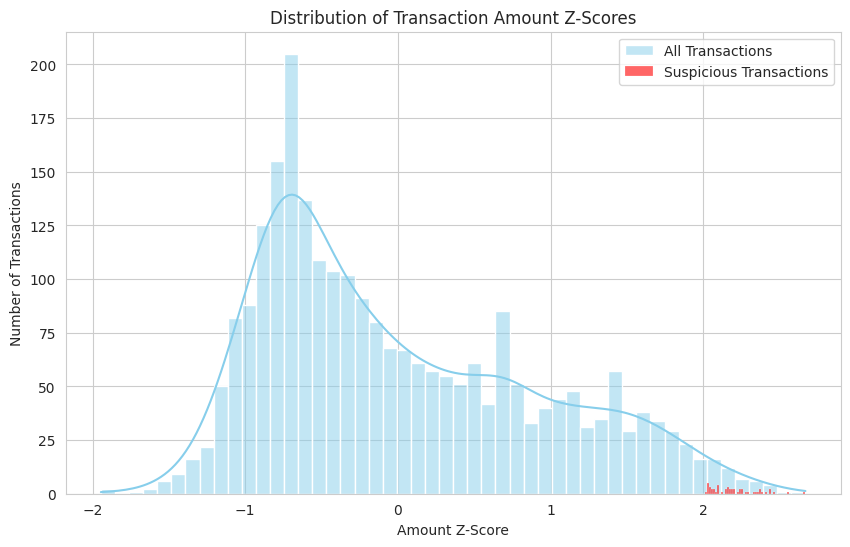

In [13]:
# Choose a threshold for suspicious transactions
threshold = 2

# Flag suspicious transactions
df['SuspiciousTransaction'] = (df['AmountZScore'].abs() > threshold)

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['AmountZScore'], bins=50, kde=True, color='skyblue', label='All Transactions')

# Highlight suspicious transactions on the histogram
sns.histplot(df.loc[df['SuspiciousTransaction'], 'AmountZScore'],
             bins=50, color='red', alpha=0.6, label='Suspicious Transactions')

plt.title('Distribution of Transaction Amount Z-Scores')
plt.xlabel('Amount Z-Score')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

/tmp/ipython-input-234841934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HighLoginAttempts', data=df, palette='Set2')


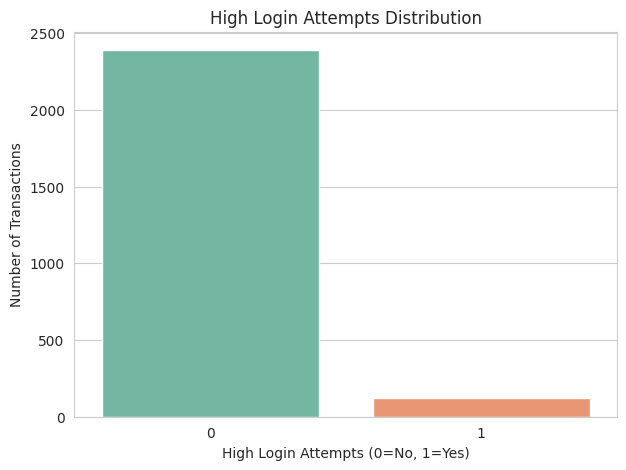

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x='HighLoginAttempts', data=df, palette='Set2')
plt.title('High Login Attempts Distribution')
plt.xlabel('High Login Attempts (0=No, 1=Yes)')
plt.ylabel('Number of Transactions')
plt.show()

/tmp/ipython-input-2942232547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HighLoginAttempts', y='TransactionAmount', data=df, palette='coolwarm')


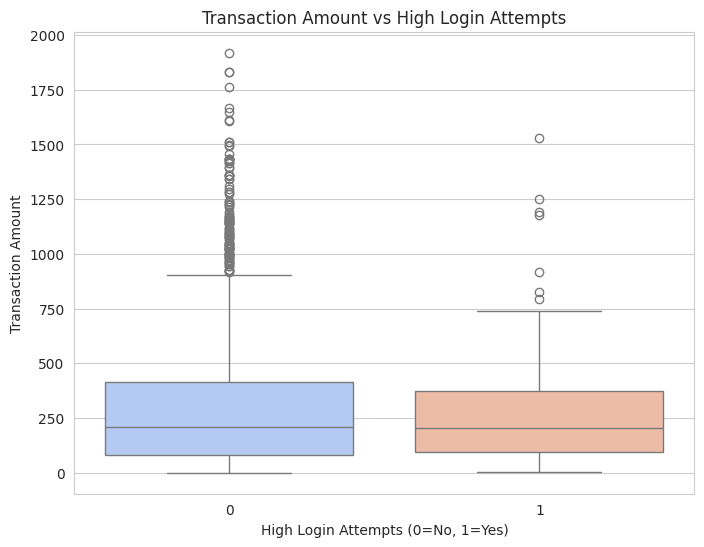

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x='HighLoginAttempts', y='TransactionAmount', data=df, palette='coolwarm')
plt.title('Transaction Amount vs High Login Attempts')
plt.xlabel('High Login Attempts (0=No, 1=Yes)')
plt.ylabel('Transaction Amount')
plt.show()

In [42]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Select features for anomaly detection
features = ['TransactionAmount', 'LoginAttempts', 'AmountToBalanceRatio',
            'AccountsPerDevice', 'AccountsPerIP']

# Fill missing values
X = df[features].fillna(0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest with adjusted contamination
iso_forest = IsolationForest(contamination=0.02, random_state=42)
df['AnomalyScore'] = iso_forest.fit_predict(X_scaled)

# Map anomalies to 1, normal to 0
df['FinalFraudPrediction'] = (df['AnomalyScore'] == -1).astype(int)

# Check results
print(df['FinalFraudPrediction'].value_counts())

FinalFraudPrediction
0    2461
1      51
Name: count, dtype: int64


In [43]:
def flag_suspicious_transactions(row):
    flags = []

    # Large transactions relative to account balance
    if row['TransactionAmount'] > row['AccountBalance'] * 0.5:
        flags.append('Large relative transaction')

    # Multiple login attempts
    if row['LoginAttempts'] > 3:
        flags.append('High login attempts')

    # Multiple accounts from same device
    if row['AccountsPerDevice'] > 3:
        flags.append('Multiple accounts from device')

    # Multiple accounts from same IP
    if row['AccountsPerIP'] > 5:
        flags.append('Multiple accounts from IP')

    # Unusual time (late night transactions)
    if row['TransactionHour'] < 6 or row['TransactionHour'] > 22:
        flags.append('Unusual transaction time')

    # Very short time between transactions
    if row['TimeSinceLastTransaction'] < 0.1:  # less than 6 minutes
        flags.append('Rapid successive transactions')

    return flags

df['SuspiciousFlags'] = df.apply(flag_suspicious_transactions, axis=1)
df['SuspiciousScore'] = df['SuspiciousFlags'].apply(len)

In [44]:
df['FinalFraudPrediction'] = ((df['SuspiciousScore'] > 0) | (df['IsFraudPredicted'] == 1)).astype(int)

In [45]:
print(df['IsFraudPredicted'].value_counts())

IsFraudPredicted
0    2461
1      51
Name: count, dtype: int64


In [46]:
comparison = df[(df['IsFraudPredicted'] == 1) & (df['SuspiciousScore'] > 0)]
print(len(comparison))

51


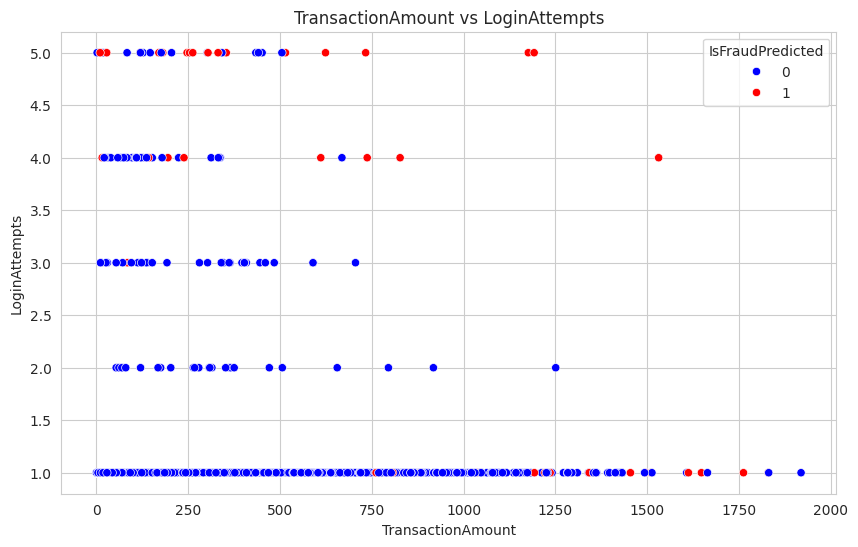

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='TransactionAmount',
    y='LoginAttempts',
    hue='IsFraudPredicted',
    data=df,
    palette={0:'blue', 1:'red'}
)
plt.title('TransactionAmount vs LoginAttempts')
plt.show()

In [48]:
top_suspicious = df.sort_values(by='SuspiciousScore', ascending=False).head(10)
print(top_suspicious[['TransactionID','TransactionAmount','LoginAttempts','SuspiciousFlags','IsFraudPredicted']])

     TransactionID  TransactionAmount  LoginAttempts  \
623       TX000624             342.17              1   
1981      TX001982             584.88              1   
1255      TX001256             847.45              1   
1258      TX001259             603.23              1   
257       TX000258             341.15              1   
626       TX000627             253.47              1   
2010      TX002011             198.01              1   
1247      TX001248            1647.74              1   
614       TX000615            1342.25              1   
2065      TX002066             604.50              1   

                                        SuspiciousFlags  IsFraudPredicted  
623   [Large relative transaction, Multiple accounts...                 0  
1981  [Large relative transaction, Multiple accounts...                 0  
1255  [Large relative transaction, Multiple accounts...                 0  
1258  [Large relative transaction, Multiple accounts...                 1  
257

In [49]:
from google.colab import files

# Save the CSV
df.to_csv('processed_transactions.csv', index=False)

# Download the CSV to your computer
files.download('processed_transactions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>